In [13]:
import cv2
import os as os
from os import listdir
from os.path import isfile, join
import json
import pickle
import torch
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import torch.nn as nn
import random
import time
from dataset import *
import sys

In [4]:
PathA = "./dataset/trainA/"
PathB = "./dataset/trainB/"

In [17]:
dataLoaderA = DataLoader()
dataLoaderB = DataLoader()
for i in range(1,100):
    imgA = cv2.imread(PathA + str(i) + "_A.jpg")
    imgB = cv2.imread(PathB + str(i) + "_B.jpg")
    tensorA = torch.from_numpy(imgA).type(torch.float)
    tensorB = torch.from_numpy(imgB).type(torch.float)
    dataLoaderA.add(tensorA)
    dataLoaderB.add(tensorB)
saveToFile(dataLoaderA, "dataLoaderA.pkl")
saveToFile(dataLoaderB, "dataLoaderB.pkl")

912

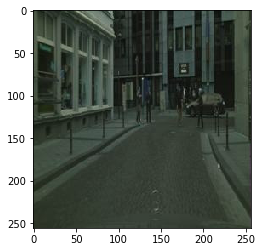

In [18]:
plt.imshow(imgA)
sys.getsizeof(dataLoaderA.storage)

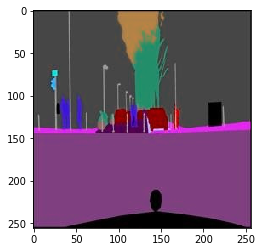

In [31]:
a = dataLoaderB.get()
print()
b = a.view(256,256,3).detach().numpy().astype(np.int)
plt.imshow(b)